In [12]:
import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import Flatten
# from tensorflow.keras.layers import Input
# from tensorflow.keras.layers import BatchNormalization
# from tensorflow.keras.layers import Dropout
# from tensorflow.keras.layers import LSTM
# from tensorflow.keras.models import Model
# from tensorflow.keras.models import Sequential, load_model
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('data/results.csv')
print("Dane przed usunięciem NaN:", len(data), "liczba kolumn: ", len(data.columns))
# data = data.drop('Wolumen_ftse250_d', 1)
# data['Zamkniecie'] = data['Zamkniecie'].shift(-1)
data = data.dropna()
print("Dane po usunięciu NaN:", len(data), "liczba kolumn: ", len(data.columns))

Dane przed usunięciem NaN: 202 liczba kolumn:  133
Dane po usunięciu NaN: 202 liczba kolumn:  133


In [4]:
print(data.head)

<bound method NDFrame.head of            Data  Otwarcie  Najwyzszy  Najnizszy  Zamkniecie  Otwarcie_wig_d  \
0    2020-06-19    229.89     232.42     226.61      229.56        50501.03   
1    2020-06-22    229.42     246.74     227.09      243.12        50642.94   
2    2020-06-23    243.07     244.84     240.89      244.16        50942.90   
3    2020-06-24    244.16     249.12     231.10      234.60        51616.42   
4    2020-06-25    234.61     235.58     227.46      234.09        50346.03   
..          ...       ...        ...        ...         ...             ...   
197  2021-03-31   1845.03    1947.24    1775.17     1930.98        58432.15   
198  2021-04-01   1930.41    1981.83    1891.66     1963.48        58243.34   
199  2021-04-06   2108.38    2150.66    2047.15     2114.64        58832.72   
200  2021-04-07   2113.06    2128.40    1933.50     1996.36        60018.61   
201  2021-04-08   1996.68    2077.21    1950.94     2049.58        59874.38   

     Najwyzszy_wig_d 

In [5]:
data.describe()

,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Otwarcie_wig_d,Najwyzszy_wig_d,Najnizszy_wig_d,Zamkniecie_wig_d,Wolumen,Otwarcie_res,...,Najnizszy_bch_v_d.1,Zamkniecie_bch_v_d.1,Otwarcie_usdchf_d.1,Najwyzszy_usdchf_d.1,Najnizszy_usdchf_d.1,Zamkniecie_usdchf_d.1,Otwarcie_eurusd_d.1,Najwyzszy_eurusd_d.1,Najnizszy_eurusd_d.1,Zamkniecie_eurusd_d.1
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,2.020000e+02,202.000000,...,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,786.207079,818.127624,749.817574,790.077129,53499.141980,53868.304356,53060.129109,53467.689703,6.143778e+07,786.207079,...,328.256485,343.457574,0.912463,0.915334,0.909559,0.912348,1.185125,1.189129,1.181558,1.185515
std,584.765593,610.428055,554.099014,587.827923,3911.840602,3933.588795,3876.838103,3908.009556,1.855068e+07,584.765593,...,120.522810,130.674069,0.018170,0.018142,0.017929,0.018057,0.026158,0.025695,0.025895,0.025748
min,225.140000,228.140000,221.210000,226.310000,44413.220000,44628.080000,43679.410000,44097.980000,3.206362e+07,225.140000,...,204.010000,208.360000,0.878670,0.881670,0.877460,0.878440,1.118350,1.123940,1.116840,1.118650
25%,367.055000,376.597500,355.562500,367.027500,50641.380000,50933.452500,50255.710000,50572.480000,4.738840e+07,367.055000,...,234.370000,241.427500,0.898820,0.902090,0.896073,0.898742,1.174863,1.178918,1.171405,1.174907
50%,444.835000,462.310000,432.235000,455.095000,52475.860000,52646.275000,52157.685000,52422.425000,5.751582e+07,444.835000,...,272.380000,284.040000,0.911200,0.914295,0.908710,0.911240,1.184735,1.188910,1.181215,1.184990
75%,1333.500000,1386.235000,1235.567500,1346.625000,57487.935000,57876.600000,56961.352500,57450.150000,7.015038e+07,1333.500000,...,428.972500,450.005000,0.923673,0.928545,0.921508,0.923665,1.207688,1.211067,1.204240,1.207640
max,2113.060000,2150.660000,2047.150000,2114.640000,60018.610000,60520.710000,59517.650000,60023.320000,1.303857e+08,2113.060000,...,692.260000,727.840000,0.951580,0.953260,0.948800,0.952080,1.232860,1.234440,1.225150,1.229740


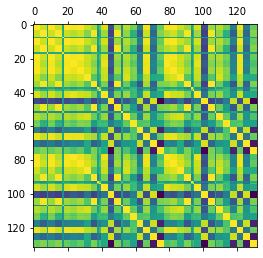

In [6]:
plt.matshow(data.corr())

In [7]:
def plot_corr(df, size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize = (size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)

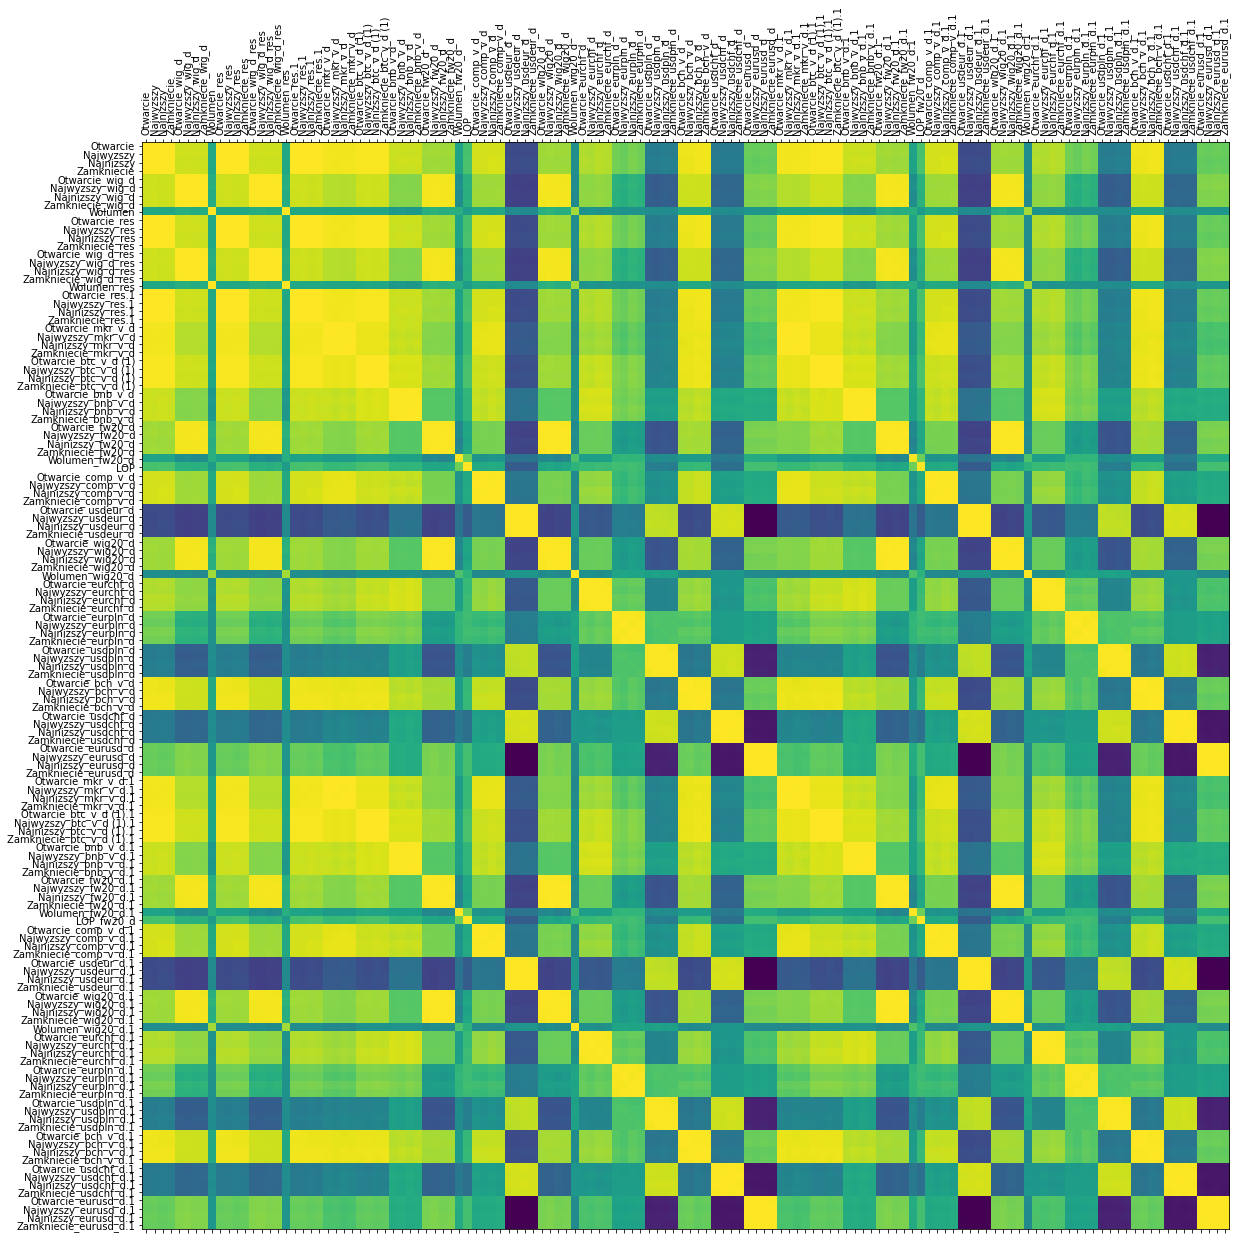

In [8]:
plot_corr(data,20)
plt.savefig('corr.png')

In [9]:
corr = data.corr()
corr.style.background_gradient(cmap='Oranges')

In [10]:
corr.to_csv('data/corr.csv')

In [11]:
from sklearn.preprocessing import MinMaxScaler

class BatchedData():
    from sklearn.preprocessing import MinMaxScaler

    def __init__(self,data,num_days,scaler=MinMaxScaler()):
        self.scaler = scaler
        self.data = data
        self.num_days = num_days
        
        
        #ogólnie zmienne z literą "X" dotyczą zbioru wejściowego, natomiast z literą "Y" dotyczą zbioru wyjściowego
        
        self.X = self.scaler.fit_transform(self.data.drop(columns=['Data','Zamkniecie']))#normalizacja danych i usunięcie kolumn, które nie mają być danymi wejściowymi
        self.y = self.data['Zamkniecie'].values/np.max(self.data['Zamkniecie'])#wartość kolumny "Zamknięcie" jest prognozowana na wyjściu sieci
    
        self.rng = np.random.randint(1,len(self.data)-self.num_days)#losowe wybieranie rekordów do zbiorów testowych i uczących
        self.x_batch = self.X[self.rng:self.rng+self.num_days,:]
        self.y_batch = self.y[self.rng-1]

    def nextBatch(self):
        rng = np.random.randint(1,len(self.data)-self.num_days)
        
        while(True):
            rng = np.random.randint(1,len(self.data)-self.num_days)
            
            if rng != self.rng:
                self.rng = rng
                break
                
        self.x_batch = self.X[self.rng:self.rng+self.num_days,:].reshape([self.num_days,self.X.shape[1]])
        self.y_batch = self.y[self.rng-1]
        
    def createDataset(self):
        train_range = int(len(self.data) * 0.67)# zbiór uczący
        test_range = int(len(self.data) * 0.33)#zbiór testowy
        
        self.X_train = np.zeros([train_range,num_days,self.X.shape[1]])
        self.Y_train = np.zeros([train_range])

        for i in range(train_range):
            self.nextBatch()
            self.X_train[i,:,:] = self.x_batch
            self.Y_train[i] = self.y_batch

        self.X_test = np.zeros([test_range,num_days,self.X.shape[1]])
        self.Y_test = np.zeros([test_range])

        for i in range(test_range):
            self.nextBatch()
            self.X_test[i,:,:] = self.x_batch
            self.Y_test[i] = self.y_batch